# Context
## Problem Statement
Customer analysis is a detailed analysis of customer as well as understand more customer behavior. It helps business to better understand the behavior of each customer and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.  

## Data Description
**People**  
ID: Customer's unique identifier  
Year_Birth: Customer's birth year  
Education: Customer's education level  
Marital_Status: Customer's marital status  
Income: Customer's yearly household income   
Kidhome: Number of children in customer's household  
Teenhome: Number of teenagers in customer's household  
Dt_Customer: Date of customer's enrollment with the company  
Recency: Number of days since customer's last purchase  
Complain: 1 if the customer complained in the last 2 years, 0 otherwise  

**Products**  
MntWines: Amount spent on wine in last 2 years  
MntFruits: Amount spent on fruits in last 2 years  
MntMeatProducts: Amount spent on meat in last 2 years  
MntFishProducts: Amount spent on fish in last 2 years  
MntSweetProducts: Amount spent on sweets in last 2 years  
MntGoldProds: Amount spent on gold in last 2 years  

**Promotion**  
NumDealsPurchases: Number of purchases made with a discount  
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  

**Place**  
NumWebPurchases: Number of purchases made through the company’s website  
NumCatalogPurchases: Number of purchases made using a catalogue  
NumStorePurchases: Number of purchases made directly in stores  
NumWebVisitsMonth: Number of visits to company’s website in the last month  

## Target
Need to understand behavior user.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from math import pi
import sys

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep= '\t')

In [4]:
df.head(3)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).T

ID  Year_Birth  Education  Marital_Status  Income  Kidhome  \
Missing Values   0           0          0               0      24        0   

                Teenhome  Dt_Customer  Recency  MntWines  MntFruits  \
Missing Values         0            0        0         0          0   

                MntMeatProducts  MntFishProducts  MntSweetProducts  \
Missing Values                0                0                 0   

                MntGoldProds  NumDealsPurchases  NumWebPurchases  \
Missing Values             0                  0                0   

                NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Missing Values                    0                  0                  0   

                AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
Missing Values             0             0             0             0   

                AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
Missing Values             0         0              0          0         0

Only Income has null values. I´m gonna fill them with the mean.

In [7]:
df.Income = df.Income.fillna(df.Income.mean())

In [8]:
df.duplicated().sum()

0

There are no duplicate values, indicating that I do not have any duplicated IDs.  

To prepare for the EDA, I'll drop the columns Z_CostContact and Z_Revenue because we lack information about their meanings. Additionally, I'll drop the ID column since it is not useful for data visualization or modeling purposes.

In [9]:
df = df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

Furthermore, I'll rename all the columns to lowercase. This is for personal preference, as it enhances consistency and readability in the dataset.

In [10]:
df.columns = [x.lower() for x in df.columns]

In [11]:
df = df.rename(
    columns={
        "mntwines": "wines",
        "mntfruits": "fruits",
        "mntmeatproducts": "meat",
        "mntfishproducts": "fish",
        "mntsweetproducts": "sweets",
        "mntgoldprods": "gold",
        "numdealspurchases": "deals_purchases",
        "numwebpurchases": "web_purchases",
        "numcatalogpurchases": "catalog_purchases",
        "numstorepurchases": "store_purchases",
        "numwebvisitsmonth": "web_visits_month",
        "acceptedcmp1": "campaign_1",
        "acceptedcmp2": "campaign_2",
        "acceptedcmp3": "campaign_3",
        "acceptedcmp4": "campaign_4",
        "acceptedcmp5": "campaign_5",
    }
)

Finally, I'll convert the Customer_Dt column to datetime format.

In [12]:
df.dt_customer = pd.to_datetime(df.dt_customer, format='%d-%m-%Y', errors='coerce')

In [13]:
num_cols = df.select_dtypes(exclude='object').columns
cat_cols = df.select_dtypes(include='object').columns

In [14]:
print(f'Numerical Columns: {num_cols.tolist()}\nCategorical Columns: {cat_cols.tolist()}')

Numerical Columns: ['year_birth', 'income', 'kidhome', 'teenhome', 'dt_customer', 'recency', 'wines', 'fruits', 'meat', 'fish', 'sweets', 'gold', 'deals_purchases', 'web_purchases', 'catalog_purchases', 'store_purchases', 'web_visits_month', 'campaign_3', 'campaign_4', 'campaign_5', 'campaign_1', 'campaign_2', 'complain', 'response']
Categorical Columns: ['education', 'marital_status']


In [15]:
def sns_plots(
    data,
    features,
    histplot=True,
    countplot=False,
    barplot=False,
    barplot_y=None,
    various_barplots=False,
    barplot_x=None,
    boxplot=False,
    boxplot_x=None,
    outliers=False,
    kde=False,
    hue=None,
    palette=None,
    style="whitegrid",
):
    try:
        sns.set_theme(style=style)
        num_features = len(features)
        num_rows = num_features // 3 + (num_features % 3 > 0)

        fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))

        for i, feature in enumerate(features):
            row = i // 3
            col = i % 3

            ax = axes[row, col] if num_rows > 1 else axes[col]

            if countplot:
                sns.countplot(data=data, x=feature, hue=hue, ax=ax, palette=palette)
                for container in ax.containers:
                    ax.bar_label(container)

            elif barplot:
                ax = sns.barplot(
                    data=data,
                    x=feature,
                    y=barplot_y,
                    hue=hue,
                    ax=ax,
                    ci=None,
                    palette=palette,
                )
                for container in ax.containers:
                    ax.bar_label(container)

            elif various_barplots:
                ax = sns.barplot(
                    data=data,
                    x=barplot_x,
                    y=feature,
                    hue=hue,
                    ax=ax,
                    ci=None,
                    palette=palette,
                )
                for container in ax.containers:
                    ax.bar_label(container)

            elif boxplot:
                sns.boxplot(
                    data=data,
                    x=boxplot_x,
                    y=feature,
                    showfliers=outliers,
                    ax=ax,
                    palette=palette,
                )

            elif outliers:
                sns.boxplot(data=data, x=feature, ax=ax, palette=palette)

            else:
                sns.histplot(
                    data=data, x=feature, hue=hue, kde=kde, ax=ax, palette=palette
                )

            ax.set_title(feature)
            ax.set_xlabel("")

        # Removing unused axes.
        if num_features < len(axes.flat):
            for j in range(num_features, len(axes.flat)):
                fig.delaxes(axes.flat[j])

        plt.tight_layout()

    except Exception as e:
        raise CustomException(e, sys)

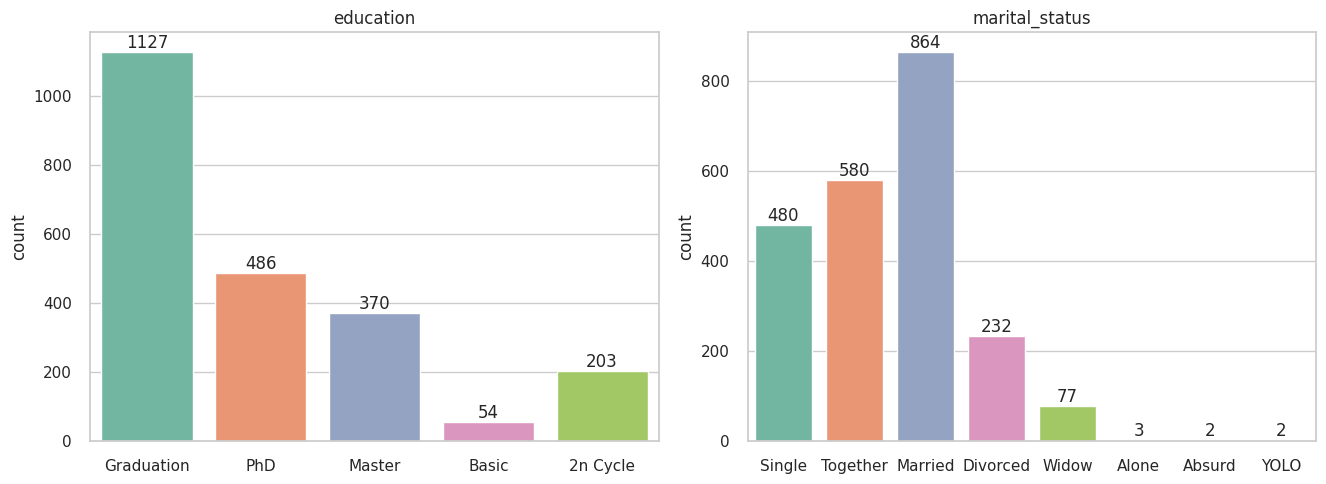

In [16]:
sns_plots(data=df, features=cat_cols, countplot=True, palette='Set2')

**Education**: There are 5 unique values, which, in my opinion, are not well-distributed. So, I'll group them into undergraduate, graduate, and postgraduate categories to simplify and enhance our analysis

In [17]:
df.education = df.education.replace(
    {
        "Basic": "Undergraduate",
        "2n Cycle": "Undergraduate",
        "Graduation": "Graduate",
        "Master": "Postgraduate",
        "PhD": "Postgraduate",
    }
)

**Marital Status**: Similar to the issue with education, the distribution of marital status categories may pose an sampling challenge. To address this, I will create a new column called living_with and group the status into Alone and Partner, and drop the marital_status.

In [18]:
df["living_with"] = df.marital_status.replace(
    {
        "Married": "Partner",
        "Together": "Partner",
        "Absurd": "Alone",
        "Widow": "Alone",
        "YOLO": "Alone",
        "Divorced": "Alone",
        "Single": "Alone",
    }
)

df.drop("marital_status", axis=1, inplace=True)

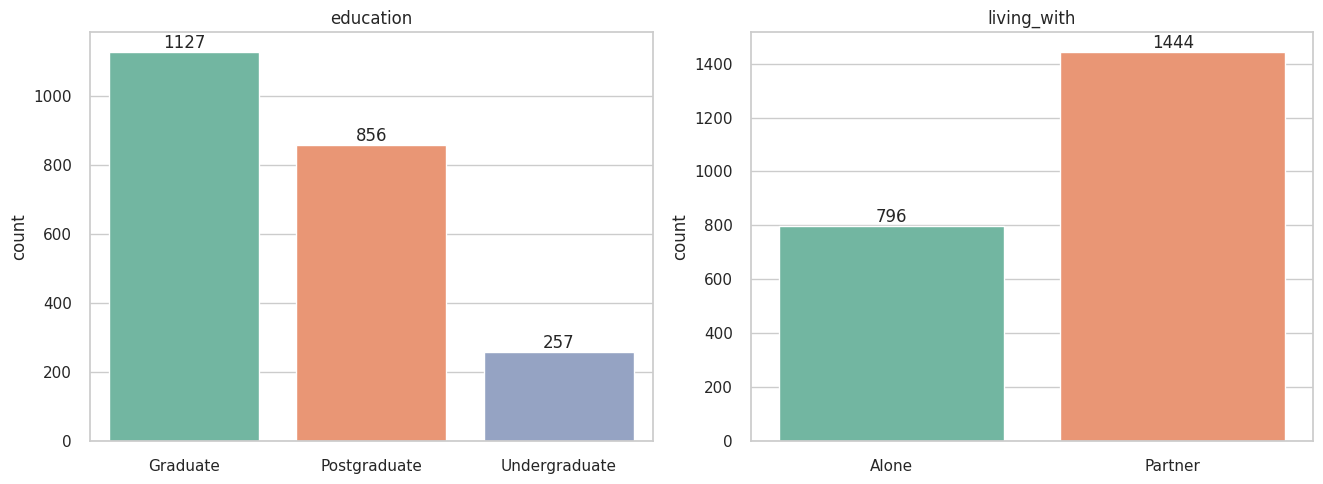

In [19]:
cat_cols = df.select_dtypes(include='object').columns
sns_plots(data=df, features=cat_cols, countplot=True, palette='Set2')

Numerical Features  

Before proceeding with the numerical analysis, I'll enhance and update the dataset by calculating the age of each customer, their total spending amount and the number of family members. Consequently, I'll drop the columns kidhome, teenhome and year_birth

In [20]:
df['age'] = 2024 - df.year_birth

In [21]:
df['total_spent'] = df.wines + df.fruits + df.meat + df.fish + df.sweets + df.gold

In [22]:
df['children'] = df.kidhome + df.teenhome

In [23]:
df['family_size'] = df.living_with.replace({'Alone': 1, 'Partner': 2})
df.family_size = df.family_size + df.children

In [24]:
df.drop(['kidhome', 'teenhome', 'year_birth', 'dt_customer'], axis=1, inplace=True)

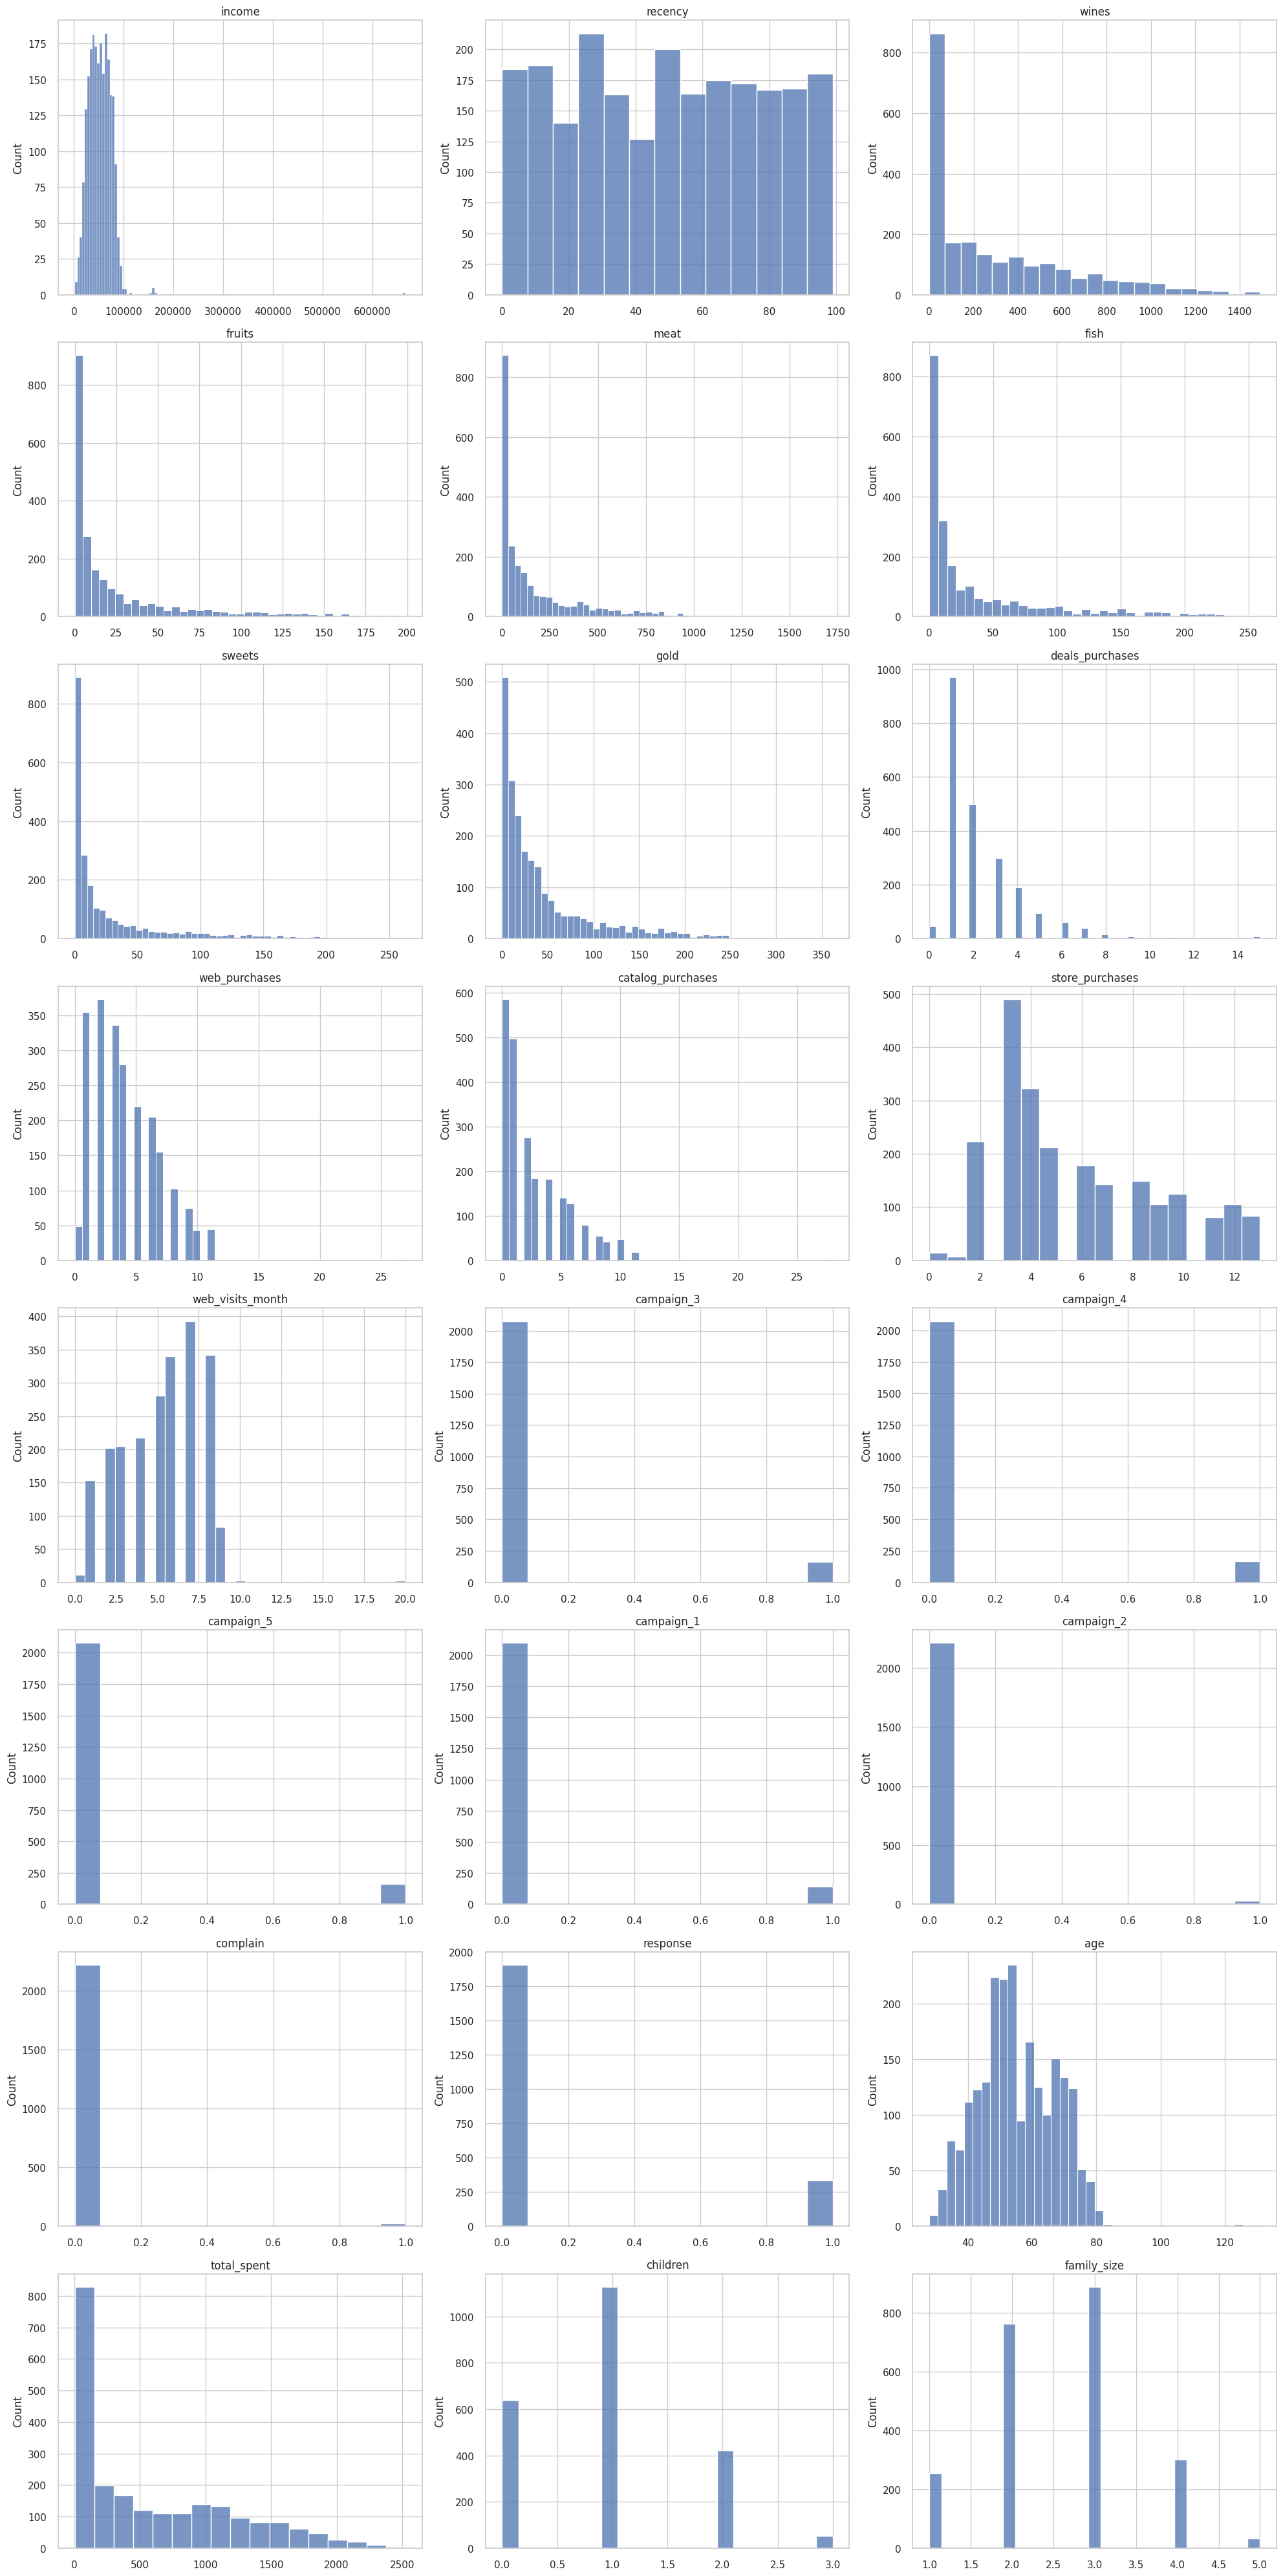

In [25]:
num_cols = df.select_dtypes(exclude='object').columns
sns_plots(data=df, features=num_cols, histplot=True)

In [26]:
df[num_cols].describe()

income      recency        wines       fruits         meat  \
count    2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    52247.251354    49.109375   303.935714    26.302232   166.950000   
std     25037.797168    28.962453   336.597393    39.773434   225.715373   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35538.750000    24.000000    23.750000     1.000000    16.000000   
50%     51741.500000    49.000000   173.500000     8.000000    67.000000   
75%     68289.750000    74.000000   504.250000    33.000000   232.000000   
max    666666.000000    99.000000  1493.000000   199.000000  1725.000000   

              fish       sweets         gold  deals_purchases  web_purchases  \
count  2240.000000  2240.000000  2240.000000      2240.000000    2240.000000   
mean     37.525446    27.062946    44.021875         2.325000       4.084821   
std      54.628979    41.280498    52.167439         1.932238       2.778714   
min       0.000000     0.000000     0.000000         0.000000       0.000000   
25%       3.000000     1.000000     9.000000         1.000000       2.000000   
50%      12.000000     8.000000    24.000000         2.000000       4.000000   
75%      50.000000    33.000000    56.000000         3.000000       6.000000   
max     259.000000   263.000000   362.000000        15.000000      27.000000   

       catalog_purchases  store_purchases  web_visits_month   campaign_3  \
count        2240.000000      2240.000000       2240.000000  2240.000000   
mean            2.662054         5.790179          5.316518     0.072768   
std             2.923101         3.250958          2.426645     0.259813   
min             0.000000         0.000000          0.000000     0.000000   
25%             0.000000         3.000000          3.000000     0.000000   
50%             2.000000         5.000000          6.000000     0.000000   
75%             4.000000         8.000000          7.000000     0.000000   
max            28.000000        13.000000         20.000000     1.000000   

        campaign_4   campaign_5   campaign_1   campaign_2     complain  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean      0.074554     0.072768     0.064286     0.013393     0.009375   
std       0.262728     0.259813     0.245316     0.114976     0.096391   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          response          age  total_spent     children  family_size  
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000  
mean      0.149107    55.194196   605.798214     0.950446     2.595089  
std       0.356274    11.984069   602.249288     0.751803     0.906959  
min       0.000000    28.000000     5.000000     0.000000     1.000000  
25%       0.000000    47.000000    68.750000     0.000000     2.000000  
50%       0.000000    54.000000   396.000000     1.000000     3.000000  
75%       0.000000    65.000000  1045.500000     1.000000     3.000000  
max       1.000000   131.000000  2525.000000     3.000000     5.000000

- There are outliers in the Income data where values exceed the mean by more than 10x, necessitating their removal.
- The distribution of customer recency is pretty even, indicating that it might not have a significant impact on clustering models.
- The product spending features (wines, fruits, meat, fish, sweets, gold, total_spent) indicate that while most consumers make modest purchases, some make significantly larger ones.
- The purchase quantity features also indicate a trend where a few customers make a high number of purchases, while most consumers tend to make a moderate number of purchases, both online and in-store.
- The fact that so few customers have embraced any of the store's current efforts suggests that they are useless. In order to segment clients and customise advertisements accordingly, clustering analysis is essential.
- Most customers are between 40 and 60 years old, but a few are over 100 years old. These older records will likely need to be removed as they may no longer relevant.
- The majority of customers have either one child or none, while very few have two or more children.

Outlier Analysis

In [27]:
def check_outliers(data, features, verbose=True):
    try:
        outlier_counts = {}
        outlier_indexes = {}
        total_outliers = 0

        for feature in features:
            Q1 = data[feature].quantile(0.25)
            Q3 = data[feature].quantile(0.75)

            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            feature_outliers = data[
                (data[feature] < lower_bound) | (data[feature] > upper_bound)
            ]
            outlier_indexes[feature] = feature_outliers.index.tolist()
            outlier_count = len(feature_outliers)
            outlier_counts[feature] = outlier_count
            total_outliers += outlier_count

        if verbose:
            print(f"There are {total_outliers} outliers in the dataset.")
            print()
            print(f"Number (percentage) of outliers per feature: ")
            print()
            for feature, count in outlier_counts.items():
                print(f"{feature}: {count} ({round(count/len(data)*100, 2)})%")

        return outlier_indexes, outlier_counts, total_outliers

    except Exception as e:
        raise CustomException(e, sys)

In [28]:
to_exclude = ['dt_customer', 'campaign_1', 'campaign_2', 'campaign_3', 'campaign_4', 'campaign_5', 'complain', 'response', 'family_size', 'total_spent']
outlier_indexes, outlier_counts, total_outliers = check_outliers(data=df, features=df[num_cols].columns.difference(to_exclude), verbose=True)

There are 1300 outliers in the dataset.

Number (percentage) of outliers per feature: 

age: 3 (0.13)%
catalog_purchases: 23 (1.03)%
children: 53 (2.37)%
deals_purchases: 86 (3.84)%
fish: 223 (9.96)%
fruits: 227 (10.13)%
gold: 207 (9.24)%
income: 8 (0.36)%
meat: 175 (7.81)%
recency: 0 (0.0)%
store_purchases: 0 (0.0)%
sweets: 248 (11.07)%
web_purchases: 4 (0.18)%
web_visits_month: 8 (0.36)%
wines: 35 (1.56)%


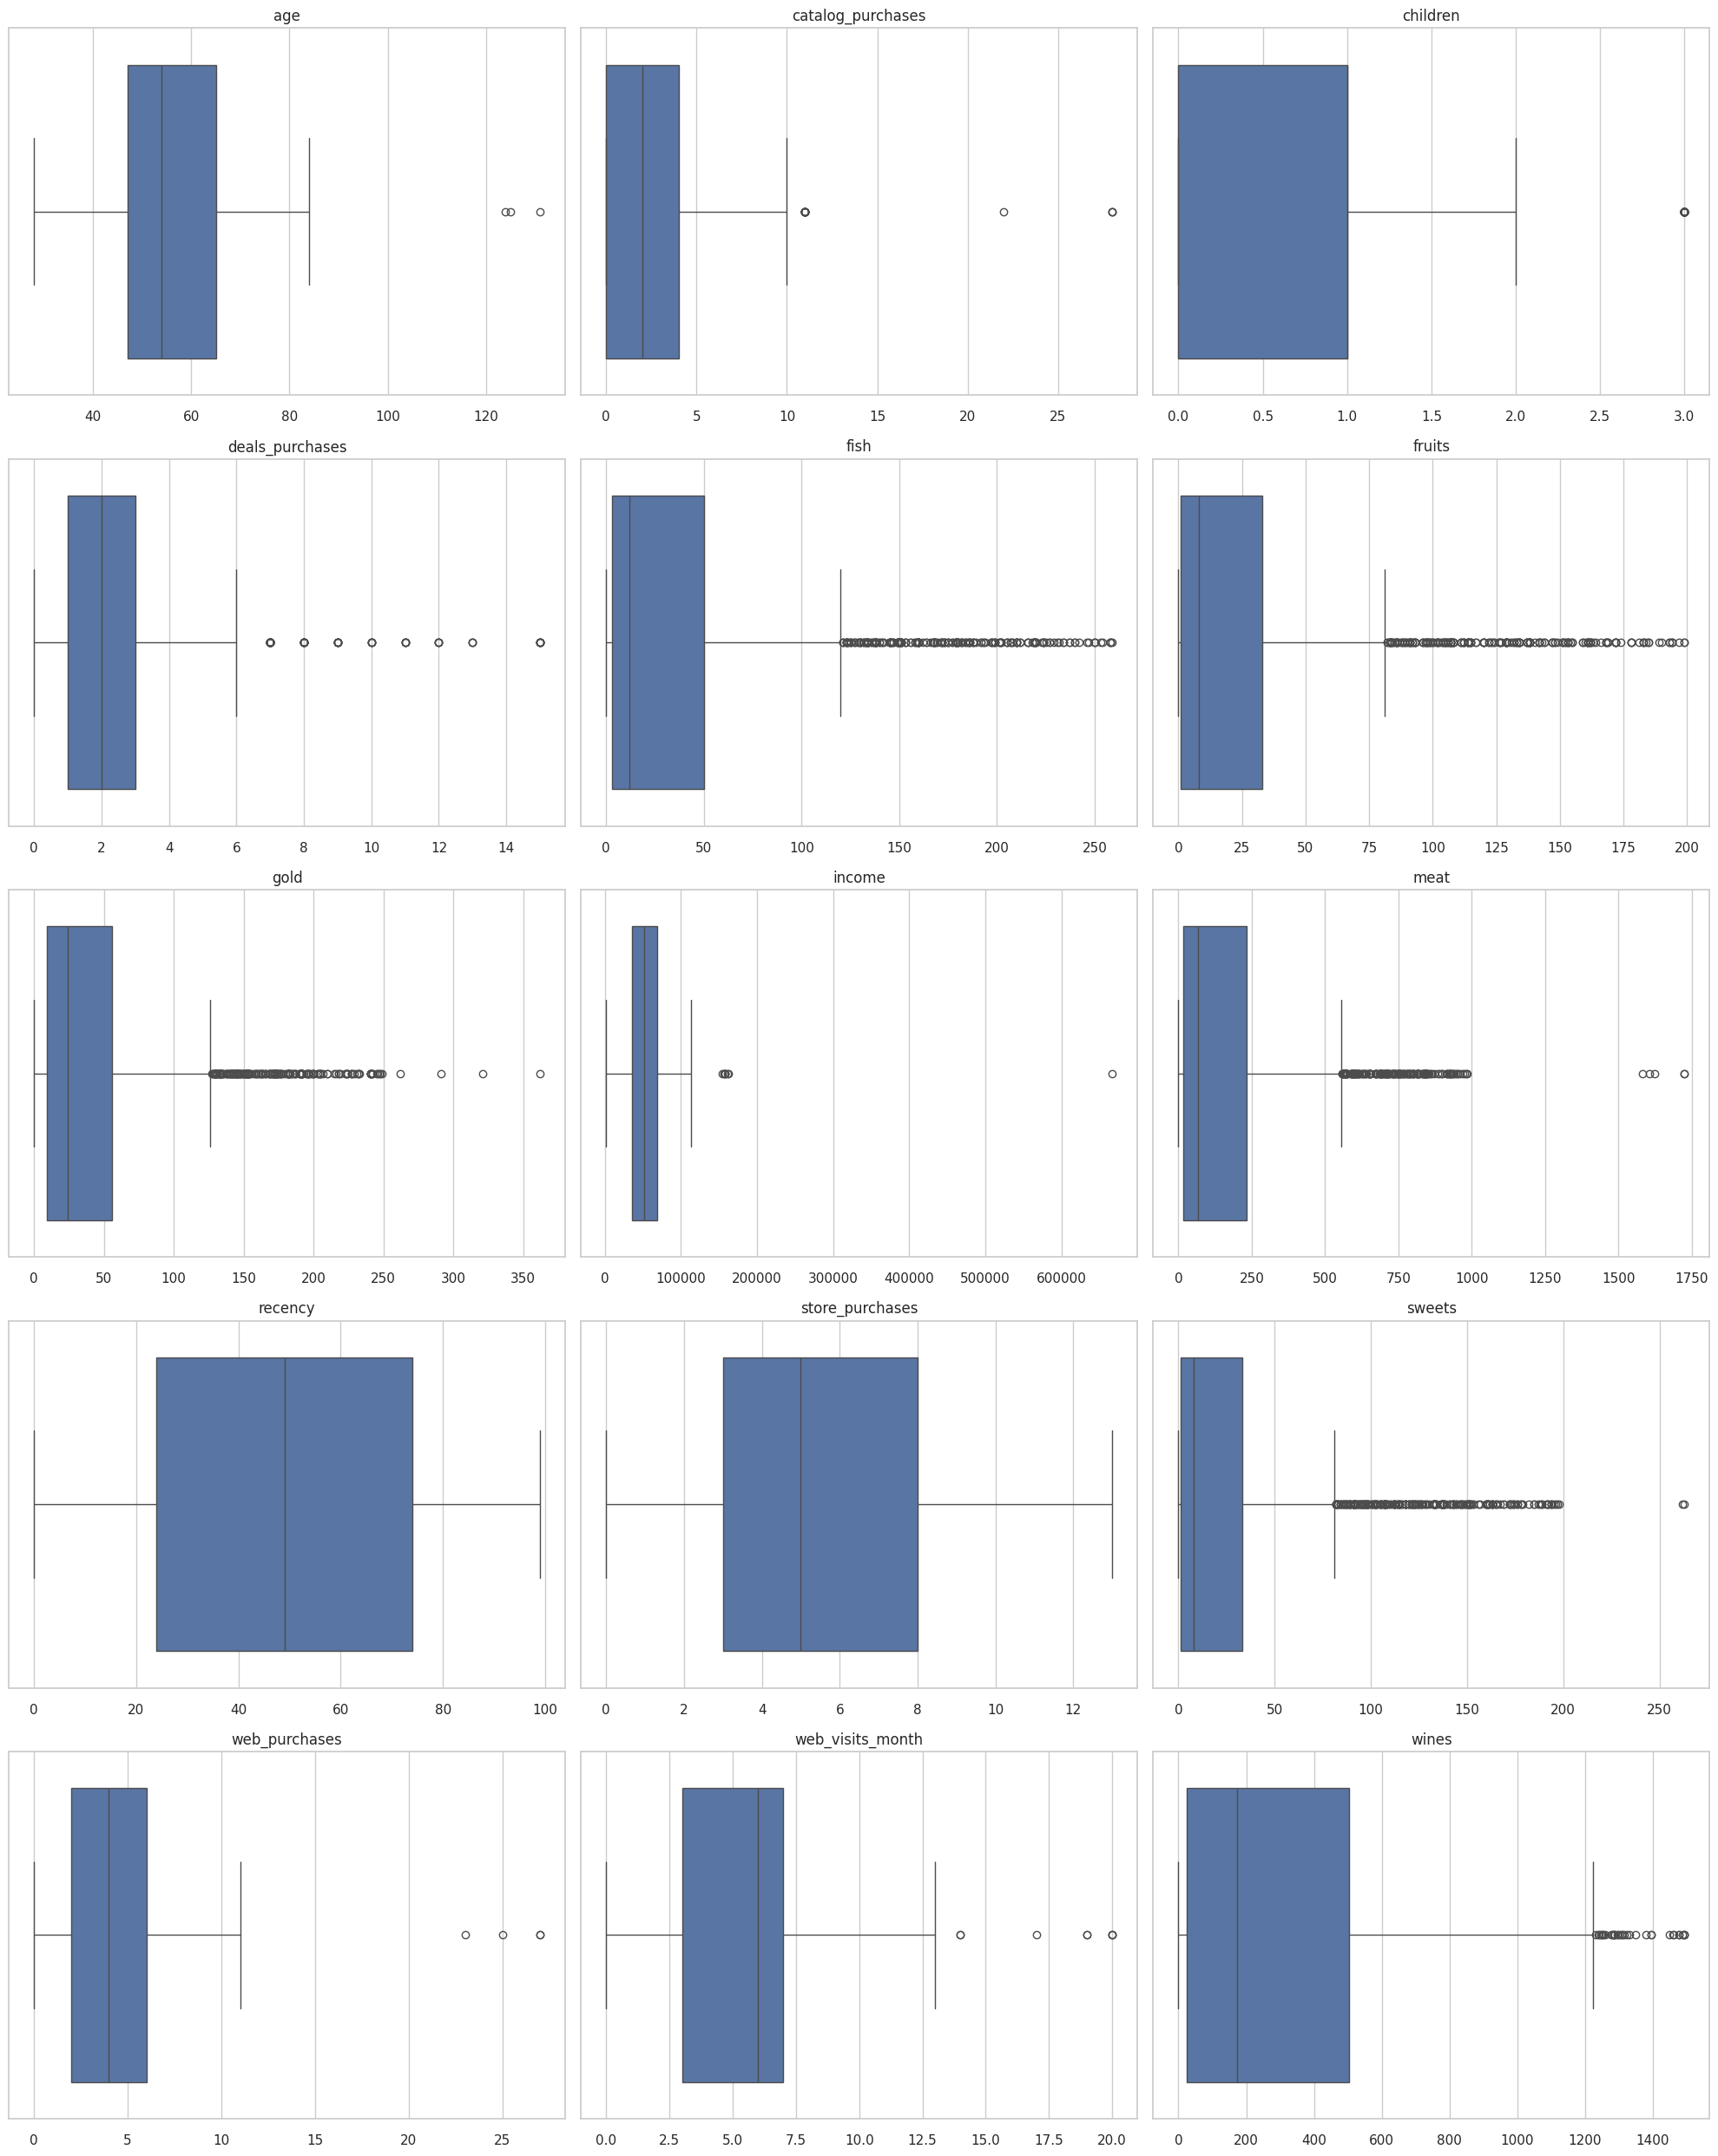

In [29]:
sns_plots(data=df, features=df[num_cols].columns.difference(to_exclude), outliers=True)

Naturally, there are a lot of outliers in the features that indicate the spending amounts on various product types, which reflect the distinct purchase behaviours of customers. I won't be removing these outliers because they don't produce inconsistent information.  
There aren't many outliers in either income or age. Interestingly, a few clients has more than 120 years, and one had an income of $600,000—ten times greater than the average. I intend to delete these outliers because they could introduce inconsistent information.  

I won't remove any outliers from features like spending amounts on products. Removing new customers from clustering would be harmful if they exhibit higher spending tendencies. In addition, the impact of anomalies can be greatly reduced by using dimensionality reduction techniques prior to modelling.

Correlation Matrix

In [30]:
corr_matrix = df[num_cols].corr()

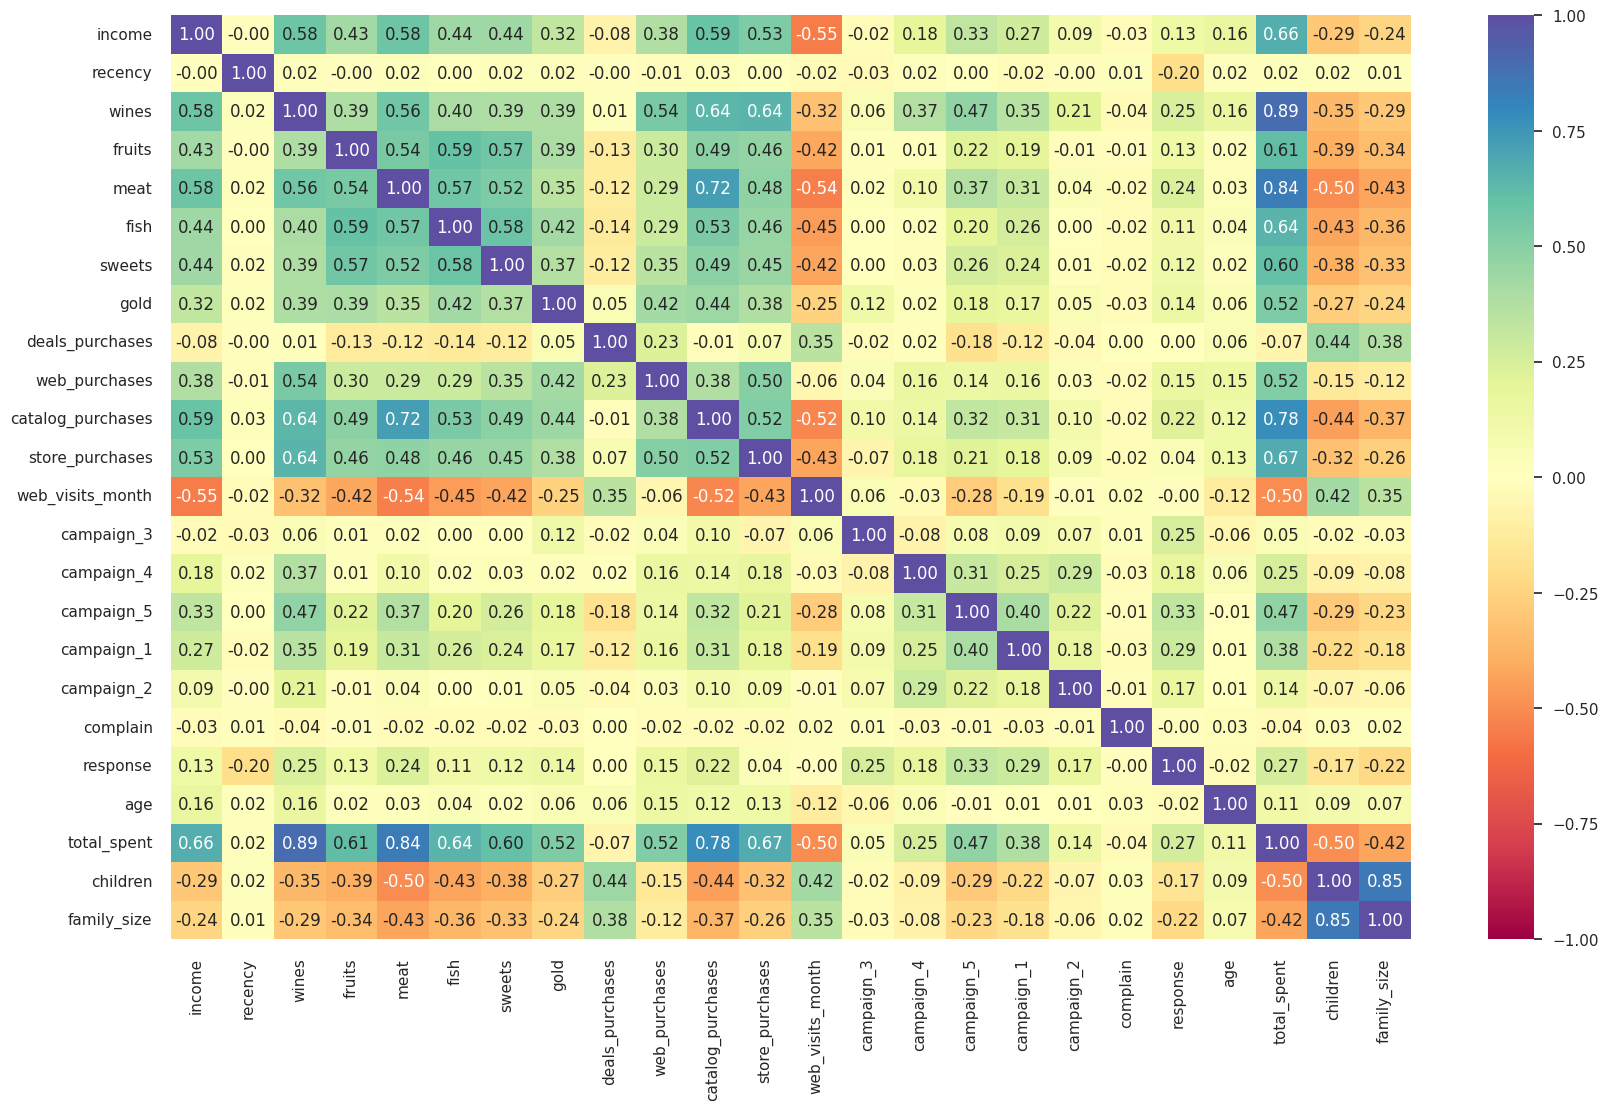

In [31]:
plt.figure(figsize=(20, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

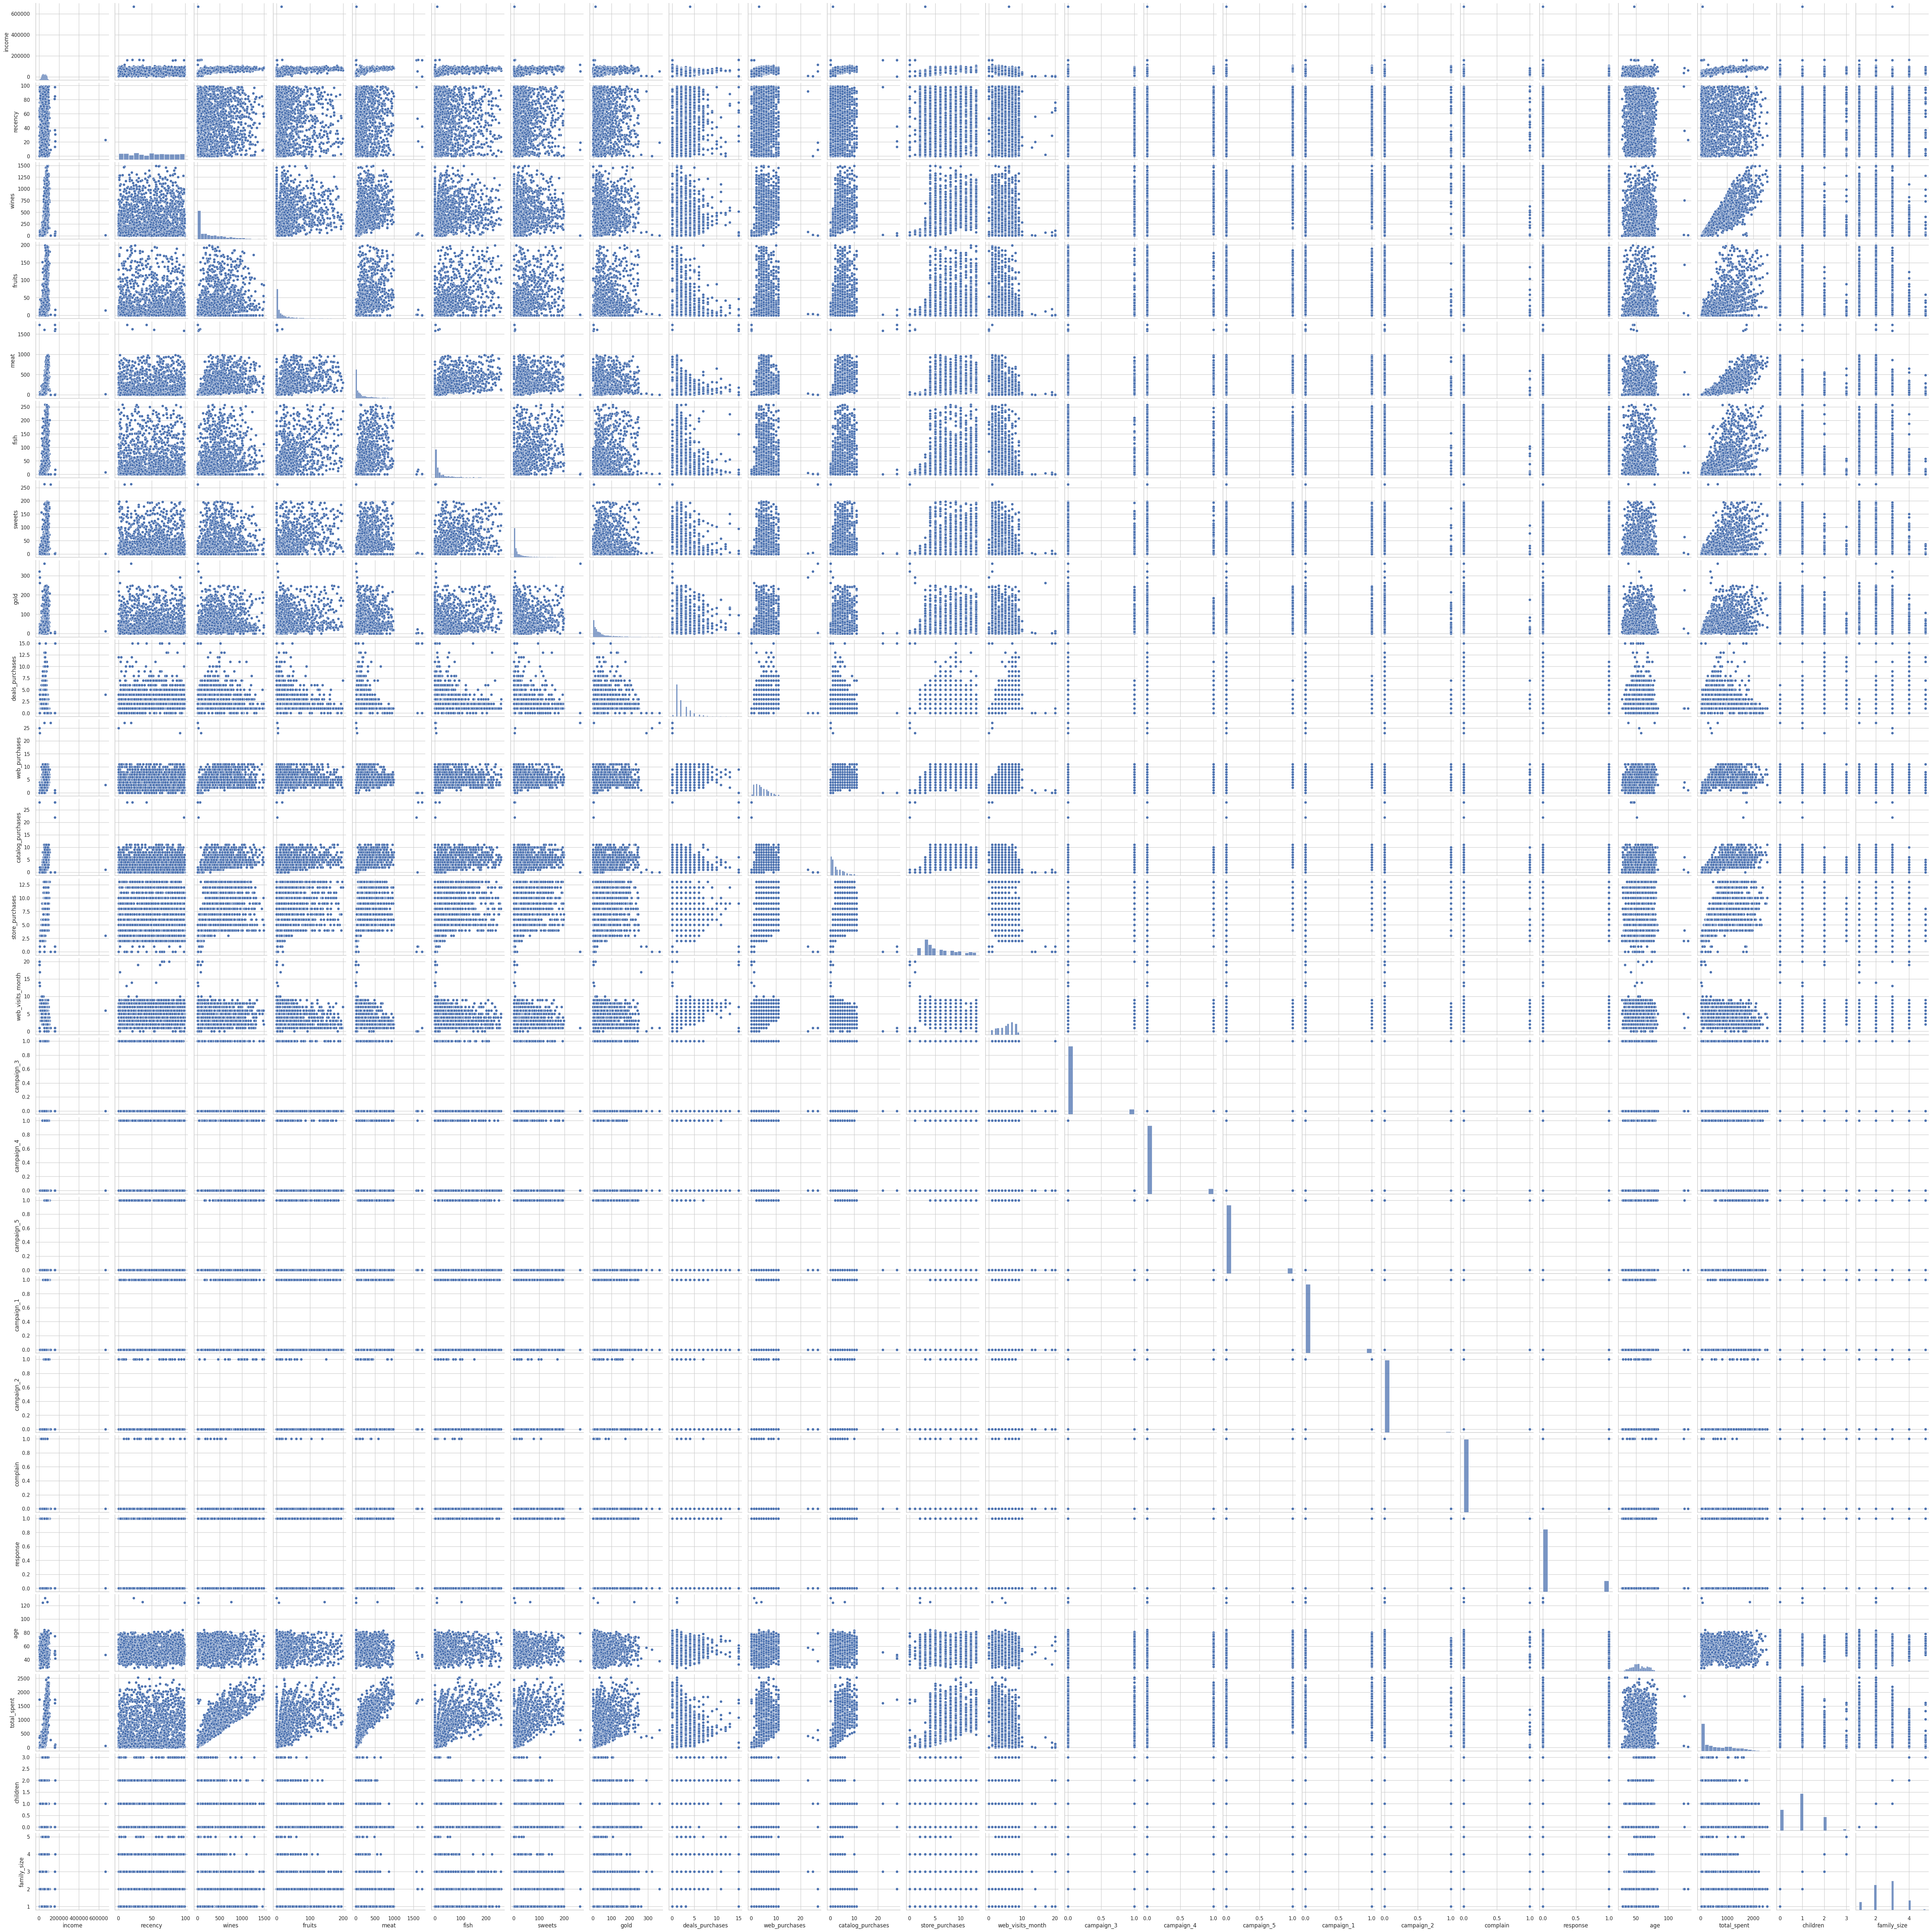

In [32]:
sns.pairplot(df)

In this headmap chart, I can clearly observe both positive and negative relationships between various features. Let's delve into these relationships.  

**Income**  

- Income has a positive correlation with each product category, indicating that customers with higher incomes tend to buy more items, which makes sense.

- Income also shows positive correlations with web, store, and catalog purchases. This suggests that higher-income customers are more likely to make purchases through these channels.

- Income is strongly negatively correlated with the number of web visits per month.

- Customers with higher incomes are more likely to accept campaigns.

- Income and family size are negatively correlated, indicating that customers with higher incomes tend to have fewer or no children, and vice versa.

Insight: The most valuable customers are those with higher incomes, thus the business should focus on them. And, it ought to concentrate on improving the catalogue and in-store shopping encounters.

**Web Visits**  

- The monthly web visit count shows a strong negative correlation with expenditure on various product types. This suggests that customers often purchase these products through alternate channels such as stores or catalogs.

- Additionally, there is a moderate positive correlation between monthly web visits and the frequency of discounted purchases. This indicates that customers visiting the store's website more frequently tend to take advantage of promotional offers.

**Family Size**  

- Family Size and the number of web visits per month are strongly positively correlated. This indicates that customers who have more kids at home tend to make more web visits in a month, and vice-versa.

- Family Size and the number of deals purchases are moderately positively correlated. This indicates that customers who have more teenagers at home tend to search for discounts in its purchases.

**Campaings**  

- Campaigns 1 and 5 yielded the most positive returns, indicating that customers spent more during these campaigns.  

Let's examine their overall performance

##### Campaigns overall

In [56]:
campaings = ['campaign_1', 'campaign_2', 'campaign_3', 'campaign_4', 'campaign_5']

In [57]:
cmp_analysis = df.copy()
labels = ['$1500-$10000', '$10001-$20000', '$20001-$30000', '$30001-$40000', '$40001-$50000', '$50001-$60000', '$60001-$70000', '$70001-$80000', '$80001-$90000', '$90001-$100000', '>$100000']
bin_edges = [1500, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 115000]
cmp_analysis['income_cat'] = pd.cut(x=cmp_analysis['income'], bins=bin_edges, labels=labels)

In [58]:
cmp_analysis.groupby(["income_cat"])[campaings].mean()

campaign_1  campaign_2  campaign_3  campaign_4  campaign_5
income_cat                                                                
$1500-$10000      0.000000    0.000000    0.068966    0.000000    0.000000
$10001-$20000     0.000000    0.000000    0.112245    0.000000    0.000000
$20001-$30000     0.000000    0.000000    0.053498    0.000000    0.000000
$30001-$40000     0.002762    0.000000    0.096685    0.008287    0.000000
$40001-$50000     0.006098    0.012195    0.085366    0.042683    0.000000
$50001-$60000     0.017699    0.017699    0.056047    0.117994    0.008850
$60001-$70000     0.051051    0.012012    0.036036    0.108108    0.033033
$70001-$80000     0.161512    0.010309    0.061856    0.099656    0.151203
$80001-$90000     0.292683    0.060976    0.134146    0.170732    0.426829
$90001-$100000    0.475000    0.050000    0.075000    0.350000    0.775000
>$100000          0.800000    0.200000    0.000000    0.600000    0.800000

- Campaigns 1 and 5 were effective for customers with incomes exceeding $70,000. However, they were ineffective for clients with lower incomes.  
- Campaign 3 had the most significant impact on clients with lower incomes.

In [59]:
bin_edges = list(range(0, 1600, 250))  
labels = ['$0-$250', '$251-$500', '$501-$750', '$751-$1000', '$1001-$1250', '$1251-$1500']

In [60]:
cmp_analysis['wines_cat'] = pd.cut(x=cmp_analysis['wines'], bins=bin_edges, labels=labels)
cmp_analysis.groupby(['wines_cat'])[campaings].mean().fillna(0)

campaign_1  campaign_2  campaign_3  campaign_4  campaign_5
wines_cat                                                              
$0-$250        0.009441    0.004721    0.064516    0.018096    0.007081
$251-$500      0.061381    0.002558    0.058824    0.061381    0.035806
$501-$750      0.116608    0.010601    0.088339    0.127208    0.120141
$751-$1000     0.204678    0.023392    0.093567    0.228070    0.280702
$1001-$1250    0.370370    0.111111    0.148148    0.370370    0.444444
$1251-$1500    0.333333    0.233333    0.133333    0.500000    0.733333

Campaigns 1, 4, and 5 performed exceptionally well for wines.

In [61]:
cmp_analysis['fruits_cat'] = pd.cut(x=cmp_analysis['fruits'], bins=bin_edges, labels=labels)
cmp_analysis.groupby(['fruits_cat'])[campaings].mean().fillna(0)

campaign_1  campaign_2  campaign_3  campaign_4  campaign_5
fruits_cat                                                             
$0-$250        0.067935    0.011413    0.072283    0.069022    0.082609
$251-$500      0.000000    0.000000    0.000000    0.000000    0.000000
$501-$750      0.000000    0.000000    0.000000    0.000000    0.000000
$751-$1000     0.000000    0.000000    0.000000    0.000000    0.000000
$1001-$1250    0.000000    0.000000    0.000000    0.000000    0.000000
$1251-$1500    0.000000    0.000000    0.000000    0.000000    0.000000

All campaigns performed poorly for fruits.

In [62]:
cmp_analysis['meat_cat'] = pd.cut(x=cmp_analysis['meat'], bins=bin_edges, labels=labels)
cmp_analysis.groupby(['meat_cat'])[campaings].mean().fillna(0)

campaign_1  campaign_2  campaign_3  campaign_4  campaign_5
meat_cat                                                               
$0-$250        0.023907    0.010496    0.070554    0.060641    0.021574
$251-$500      0.154098    0.029508    0.072131    0.124590    0.186885
$501-$750      0.230216    0.000000    0.079137    0.100719    0.273381
$751-$1000     0.320000    0.040000    0.120000    0.133333    0.413333
$1001-$1250    0.000000    0.000000    0.000000    0.000000    0.000000
$1251-$1500    0.000000    0.000000    0.000000    0.000000    0.000000

For meats, campaigns 1 and 5 did a decent job.

In [63]:
cmp_analysis['fish_cat'] = pd.cut(x=cmp_analysis['fish'], bins=bin_edges, labels=labels)
cmp_analysis.groupby(['fish_cat'])[campaings].mean().fillna(0)

campaign_1  campaign_2  campaign_3  campaign_4  campaign_5
fish_cat                                                               
$0-$250        0.067027     0.01027    0.068108    0.063784    0.078919
$251-$500      0.166667     0.00000    0.000000    0.000000    0.000000
$501-$750      0.000000     0.00000    0.000000    0.000000    0.000000
$751-$1000     0.000000     0.00000    0.000000    0.000000    0.000000
$1001-$1250    0.000000     0.00000    0.000000    0.000000    0.000000
$1251-$1500    0.000000     0.00000    0.000000    0.000000    0.000000

All campaings performed poorly for fishes

In [64]:
cmp_analysis['sweets_cat'] = pd.cut(x=cmp_analysis['sweets'], bins=bin_edges, labels=labels)
cmp_analysis.groupby(['sweets_cat'])[campaings].mean().fillna(0)

campaign_1  campaign_2  campaign_3  campaign_4  campaign_5
sweets_cat                                                             
$0-$250        0.072018    0.009896    0.071468    0.063771    0.083013
$251-$500      0.000000    0.000000    0.000000    0.000000    0.000000
$501-$750      0.000000    0.000000    0.000000    0.000000    0.000000
$751-$1000     0.000000    0.000000    0.000000    0.000000    0.000000
$1001-$1250    0.000000    0.000000    0.000000    0.000000    0.000000
$1251-$1500    0.000000    0.000000    0.000000    0.000000    0.000000

All campaings performed poorly for sweets.

In [65]:
cmp_analysis['gold_cat'] = pd.cut(x=cmp_analysis['gold'], bins=bin_edges, labels=labels)
cmp_analysis.groupby(['gold_cat'])[campaings].mean().fillna(0)

campaign_1  campaign_2  campaign_3  campaign_4  campaign_5
gold_cat                                                               
$0-$250        0.063908    0.013333    0.074943    0.074023    0.071724
$251-$500      0.000000    0.000000    0.000000    0.000000    0.000000
$501-$750      0.000000    0.000000    0.000000    0.000000    0.000000
$751-$1000     0.000000    0.000000    0.000000    0.000000    0.000000
$1001-$1250    0.000000    0.000000    0.000000    0.000000    0.000000
$1251-$1500    0.000000    0.000000    0.000000    0.000000    0.000000

All campaings performed poorly for golds.

Overall, the wine and pork campaigns did fairly well. In this situation, the business may concentrate on particular items in order to maximise profits. As an alternative, efforts might be focused on enhancing marketing campaigns for gold, sweets, seafood, and fruits.

##### Age Overall

In [79]:
labels = ['< 40', '40-60', '> 60']
bins = [0, 39, 60, float('inf')]

In [80]:
age_df = df.copy()
age_df['age_group'] = pd.cut(age_df['age'], bins=bins, labels=labels, right=False)

In [81]:
age_df

education   income  recency  wines  fruits  meat  fish  sweets  gold  \
0         Graduate  58138.0       58    635      88   546   172      88    88   
1         Graduate  46344.0       38     11       1     6     2       1     6   
2         Graduate  71613.0       26    426      49   127   111      21    42   
3         Graduate  26646.0       26     11       4    20    10       3     5   
4     Postgraduate  58293.0       94    173      43   118    46      27    15   
...            ...      ...      ...    ...     ...   ...   ...     ...   ...   
2235      Graduate  61223.0       46    709      43   182    42     118   247   
2236  Postgraduate  64014.0       56    406       0    30     0       0     8   
2237      Graduate  56981.0       91    908      48   217    32      12    24   
2238  Postgraduate  69245.0        8    428      30   214    80      30    61   
2239  Postgraduate  52869.0       40     84       3    61     2       1    21   

      deals_purchases  web_purchases  catalog_purchases  store_purchases  \
0                   3              8                 10                4   
1                   2              1                  1                2   
2                   1              8                  2               10   
3                   2              2                  0                4   
4                   5              5                  3                6   
...               ...            ...                ...              ...   
2235                2              9                  3                4   
2236                7              8                  2                5   
2237                1              2                  3               13   
2238                2              6                  5               10   
2239                3              3                  1                4   

      web_visits_month  campaign_3  campaign_4  campaign_5  campaign_1  \
0                    7           0           0           0           0   
1                    5           0           0           0           0   
2                    4           0           0           0           0   
3                    6           0           0           0           0   
4                    5           0           0           0           0   
...                ...         ...         ...         ...         ...   
2235                 5           0           0           0           0   
2236                 7           0           0           0           1   
2237                 6           0           1           0           0   
2238                 3           0           0           0           0   
2239                 7           0           0           0           0   

      campaign_2  complain  response living_with  age  total_spent  children  \
0              0         0         1       Alone   67         1617         0   
1              0         0         0       Alone   70           27         2   
2              0         0         0     Partner   59          776         0   
3              0         0         0     Partner   40           53         1   
4              0         0         0     Partner   43          422         1   
...          ...       ...       ...         ...  ...          ...       ...   
2235           0         0         0     Partner   57         1341         1   
2236           0         0         0     Partner   78          444         3   
2237           0         0         0       Alone   43         1241         0   
2238           0         0         0     Partner   68          843         1   
2239           0         0         1     Partner   70          172         2   

      family_size age_group  
0               1      > 60  
1               3      > 60  
2               2     40-60  
3               3     40-60  
4               3     40-60  
...           ...       ...  
2235            3     40-60  
2236            5      > 60  
223

In [82]:
age_df.groupby('age_group').agg({
    'catalog_purchases': 'sum',
    'store_purchases': 'sum',
    'web_purchases': 'sum'    
})

catalog_purchases  store_purchases  web_purchases
age_group                                                   
< 40                     514             1056            650
40-60                   2895             6893           4960
> 60                    2554             5021           3540

### Conclusions 
The product spending features are skewed to the right, meaning that while most customers spend less, some do so considerably more. Among all product categories, wine has the greatest average spending.  

Features related to purchase frequency also show a little right skew. In general, consumers make more purchases in-person or online; outliers signify customers who make transactions frequently.  

The efficacy of the store's existing initiatives is minimal, as only a tiny percentage of consumers participate in any given campaign. This emphasises how important clustering research is for more precise campaign targeting across client segments.  

While some clients have no childs living at home, the majority has at least one. Few people have two kids. The majority of clients also have partners and are recent grads.  

There is a substantial negative correlation between income and having children at home, indicating that consumers with higher incomes typically have fewer or no children, and vice versa.  

Spending on pricey goods like wine and meat is positively correlated with income. Given that higher-income consumers typically buy these things more frequently, this association seems sense.  

Income and catalogue and in-store purchases have a high positive correlation, whereas monthly online visits and income have a negative correlation. This emphasises how crucial it is to improve higher-income customers' catalogue and in-store shopping experiences.  

Customers with higher incomes are more inclined to participate in marketing initiatives.  

There is a somewhat good correlation between having childs at home and looking for deals while making purchases.  

The amount spent on different product kinds is strongly inversely correlated with monthly site visits, suggesting that these things are frequently bought through alternative channels like catalogues and storefronts. Additionally, there is a somewhat positive link with bargain purchases, indicating that regular users of the website have a tendency to buy things at a discount.  

Higher-income consumers were successfully targeted by Campaigns 1 and 5, especially when it came to wine and meat purchases. Customers who made larger purchases showed a significantly greater proportion of marketing acceptance.  